## Buckling of a thin annular plate clamped at the periphery and loaded by an in-plane compressive load along the periphery

The thickness of the plate is uniform ($h$). The origin of the cylindrical coordinate system is set at the centre of the mid-plane; the thickness varies from $z=-h/2$ to $z=h/2$. Because the analysis will be done throughout by carrying out integrations along the thickness, it effectively means we are using a polar coordinate system.

The inner radius is $b$ and the outer radius is $a$. The magnitude of the compressive load is $P$ per unit length of the circumference (so that the unit for P is N/m). The problem is axisymmetric.

Just like in the case of the circular plate we begin with the Foppl-von Karman equations in the form:
\begin{align*}
D \nabla^4 w &= q + \diamondsuit(F,w) \\
\nabla^4 F &= -\frac{1}{2}Eh \; \diamondsuit(w,w)
\end{align*}
where the $\diamondsuit$ operator is given by:
\begin{gather*}
\diamondsuit (f,g) = \frac{1}{2} \left\{ (\nabla^2 f) (\nabla^2 g) + \nabla^2 \left(f \nabla^2 g + g \nabla^2 f \right) \right\} - \frac{1}{4} \left\{ \nabla^4(fg) + f \nabla^4 g + g \nabla^4 f \right\}
\end{gather*}

For the axisymmetric situation under consideration and with a cylindrical coordinate system, we have dependence only on the $r$ coordinate variable. 

We first import the `polarUtilities.py` module:

In [1]:
from polarUtilities import *

We then define the diamond operator:

In [2]:
def polardiamond(f,g):
    term1 = polarLaplacian(f)*polarLaplacian(g) + polarLaplacian(f*polarLaplacian(g)+g*polarLaplacian(f))
    term2 = polarbiharmonic(f*g) + f*polarbiharmonic(g) + g*polarbiharmonic(f)
    return (sp.Rational(1,2)*term1 - sp.Rational(1,4)*term2).simplify()

Then, the two Foppl-von Karman equations become:

In [3]:
from IPython.display import Math

D = sp.symbols('D')
varphi = sp.Function('varphi')(r)
zeta = sp.Function('zeta')(r)

display(Math(r'{} = q + {}'.format(sp.latex(D*polarbiharmonic(zeta)),sp.latex(polardiamond(varphi,zeta)))))

display(Math(r'{} = -\frac{{1}}{{2}}Eh {}'.format(sp.latex(polarbiharmonic(varphi)),sp.latex(polardiamond(zeta,zeta)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

To proceed with the solution of the two equations, we first take up the second equation, and note that in the situation just before buckling starts, $\zeta = 0$. Then, the second of the Foppl-von Karman equations becomes

In [4]:
lhs = polarbiharmonic(varphi)
display(Math(r'{} = 0'.format(sp.latex(lhs))))

<IPython.core.display.Math object>

In [5]:
varphi_soln = sp.dsolve(lhs)
varphi_soln

Eq(varphi(r), C1 + C2*r**2 + C3*r**2*log(r) + C4*log(r))

This is exactly like the thick-walled pressure vessel problem where $C_3$ must be zero (from displacement considerations). So we rewrite the solution as:

In [6]:
A, B, C = sp.symbols('A, B, C')
varphi_soln = A*sp.log(r) + B*r**2 + D
display(Math(r'\varphi(r) = {}'.format(sp.latex(varphi_soln))))

<IPython.core.display.Math object>

We again define $\displaystyle \Psi(r):= \frac{{\rm d}\varphi}{{\rm d}r}$

In [7]:
Psi = sp.diff(varphi_soln,r)
display(Math(r'\Psi(r) = {}'.format(sp.latex(Psi))))

<IPython.core.display.Math object>

Now, since $\displaystyle \int_{-h/2}^{h/2}\sigma_{rr}\; {\rm d}z := \frac{1}{r}\frac{{\rm d} \varphi}{{\rm d} r}$ and $\displaystyle \int_{-h/2}^{h/2}\sigma_{\theta \theta}\; {\rm d}z := \frac{{\rm d^2} \varphi}{{\rm d} r^2}$, therefore we have $\displaystyle \int_{-h/2}^{h/2}\sigma_{rr}\; {\rm d}z := \frac{\Psi}{r}$ and $\displaystyle \int_{-h/2}^{h/2}\sigma_{\theta \theta}\; {\rm d}z := \frac{ {\rm d} \Psi}{{\rm d} r}$.

Next, we use the following boundary conditions:

At $r=a$, $\displaystyle \int_{-h/2}^{h/2} \sigma_{rr} \; {\rm d}z = -P$

At $r=b$, $\displaystyle \int_{-h/2}^{h/2} \sigma_{rr} \; {\rm d}z = 0$

In [8]:
a, b, P = sp.symbols('a, b, P', positive=True)
lhs1 = Psi.subs(r,a)/a
rhs1 = -P
eqn1 = sp.Eq(lhs1,rhs1)
display(eqn1)

lhs2 = Psi.subs(r,b)/b
rhs2 = 0
eqn2 = sp.Eq(lhs2,rhs2)
display(eqn2)

sol, = sp.linsolve([eqn1,eqn2],(A,B))
A_value = sol[0]
B_value = sol[1]

display(Math(r'A = {}'.format(sp.latex(A_value))))
display(Math(r'B = {}'.format(sp.latex(B_value))))

Eq((A/a + 2*B*a)/a, -P)

Eq((A/b + 2*B*b)/b, 0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

So, the expression for $\Psi(r)$ becomes

In [9]:
Psi_soln = Psi.subs([(A,A_value),(B,B_value)])
display(Math(r'\Psi(r) = {}'.format(sp.latex(Psi_soln))))

<IPython.core.display.Math object>

Next, we go the first of the Foppl-von Karman equations, and rewrite it in the following form:

$D \displaystyle \frac{1}{r} \frac{{\rm d}}{{\rm d} r} \left[ r \frac{{\rm d}}{{\rm d} r} \left\{ \frac{1}{r} \frac{{\rm d}}{{\rm d} r} \left( r \frac{{\rm d}\zeta}{{\rm d}r} \right) \right\} \right] = \frac{1}{r} \frac{{\rm d}}{{\rm d}r} \left( \frac{{\rm d} \varphi}{{\rm d}r} \frac{{\rm d}\zeta}{{\rm d}r}  \right) $

We cancel the $\displaystyle \frac{1}{r}$ from both sides, integrate once, and divide throughout by $r$ to obtain:

$\displaystyle D \frac{{\rm d}}{{\rm d} r} \left\{ \frac{1}{r} \frac{{\rm d}}{{\rm d} r} \left( r \frac{{\rm d}\zeta}{{\rm d}r} \right) \right\}  = \frac{1}{r}\frac{{\rm d} \varphi}{{\rm d}r} \frac{{\rm d}\zeta}{{\rm d}r}  + \frac{A_1}{r}$

Note that the shear force per unit length $\displaystyle Q_r = D \frac{{\rm d}}{{\rm d}r} \left\{ \frac{1}{r} \frac{{\rm d}}{{\rm d}r} \left( r \frac{{\rm d} \zeta}{{\rm d}r} \right) \right\}$, and $\displaystyle \sigma_{rr} = \frac{1}{r} \frac{{\rm d}\varphi}{{\rm d}r}$. 

So, if we consider the above equation at $r = b$, i.e. the inner periphery, then $\displaystyle \left. Q_r \right|_{r=b} = 0$ and $\displaystyle \left. \sigma_{rr}\right|_{r=b} = 0$, which implies that $A_1 = 0$. 

Set $\displaystyle \frac{{\rm d}\zeta}{{\rm d}r} =: W$. Then the above equation becomes:

$\displaystyle D \frac{{\rm d}}{{\rm d} r} \left\{ \frac{1}{r} \frac{{\rm d}}{{\rm d} r} \left( r W \right) \right\} = \frac{1}{r}\Psi W$

We expand the lhs and substitute the solution for $\Psi$ in the rhs to obtain

In [10]:
W = sp.Function('W')(r)

lhs = D*sp.diff(sp.diff(W,r)+W/r,r)
rhs = 1/r*(Psi_soln*W)
display(Math(r'{} = {}'.format(sp.latex(lhs),sp.latex(rhs))))

<IPython.core.display.Math object>

Set $\displaystyle \frac{P}{D} =: K^2$, and divide throughout by $r^2$ to obtain:

In [11]:
K = sp.symbols('K',positive=True)

lhs = (r**2*sp.diff(sp.diff(W,r)+W/r,r)).simplify()
rhs = r**2*1/r*(Psi_soln/P*K**2*W).simplify()
sp.Eq(lhs,rhs)

Eq(r**2*Derivative(W(r), (r, 2)) + r*Derivative(W(r), r) - W(r), K**2*a**2*(b**2 - r**2)*W(r)/(a**2 - b**2))

In [12]:
lhs_new = lhs + (K**2*a**2*r**2/(a**2-b**2) - K**2*a**2*b**2/(a**2-b**2) - 1)*W
rhs_new = 0
eq = sp.Eq(lhs_new,rhs_new)

We set $\displaystyle \bar{r} = \frac{r}{a}$, $\displaystyle \bar{b} = \frac{b}{a}$ and $\displaystyle \bar{K} = \frac{K a}{\sqrt{1 - {\bar{b}}^2}}$ to rewrite the above equation as

$\displaystyle \bar{r}^2 \frac{d^2 W}{d\bar{r}^2} + \bar{r} \frac{dW}{d\bar{r}} + (\bar{K}^2 \bar{r}^2 - 1 - \bar{K}^2 \bar{b}^2)W = 0$

and then setting $m^2 = 1+\bar{K}^2\bar{b}^2$, we obtain:

$\displaystyle \bar{r}^2 \frac{d^2 W}{d\bar{r}^2} + \bar{r} \frac{dW}{d\bar{r}} + (\bar{K}^2 \bar{r}^2 - m^2)W = 0$

We rewrite $W$ as a function of $\bar{r}$ and solve the above equation

In [13]:
m = sp.symbols('m',positive=True)
bbar = sp.symbols(r'\bar{b}',positive=True)
rbar, Kbar = sp.symbols(r'\bar{r}, \bar{K}')
W = sp.Function('W')(rbar)

lhs = rbar**2*sp.diff(W,rbar,2) + rbar*sp.diff(W,rbar) + (Kbar**2*rbar**2-m**2)*W
rhs = 0
eq = sp.Eq(lhs,rhs)
display(eq)
sp.dsolve(eq).args[1]

Eq(\bar{r}**2*Derivative(W(\bar{r}), (\bar{r}, 2)) + \bar{r}*Derivative(W(\bar{r}), \bar{r}) + (\bar{K}**2*\bar{r}**2 - m**2)*W(\bar{r}), 0)

C1*besselj(m, \bar{K}*\bar{r}) + C2*bessely(m, \bar{K}*\bar{r})

We rewrite the solution using $A$ and $B$ as the constants:

In [14]:
A, B = sp.symbols('A, B')
W_soln_m = A*sp.besselj(m,Kbar*rbar) + B*sp.bessely(m,Kbar*rbar)
W_soln_m

A*besselj(m, \bar{K}*\bar{r}) + B*bessely(m, \bar{K}*\bar{r})

The two BCs that must be satisfied are:

At $\bar{r} = 1$, $W=0$ (i.e. the slope of deflection is zero at the outer periphery)

At $\bar{r} = \bar{b}$, the moment should be zero (the condition of zero shear has already been used)

The moment is given by $\displaystyle M_r = -D\left(\frac{{\rm d}W}{{\rm d}r} + \nu \frac{W}{r} \right)$. 

We use a Poisson's ratio value of $\displaystyle \nu = \frac{1}{3}$.

In [15]:
nu = 0.33

We substitute $m = \sqrt{1 + \bar{K}^2 \bar{b}^2}$ in the solution for $W$:

In [16]:
W_soln_interim = W_soln_m.subs(m,sp.sqrt(1+Kbar**2*bbar**2))
display(W_soln_interim)

A*besselj(sqrt(\bar{K}**2*\bar{b}**2 + 1), \bar{K}*\bar{r}) + B*bessely(sqrt(\bar{K}**2*\bar{b}**2 + 1), \bar{K}*\bar{r})

Noting that $\displaystyle \bar{K}^2 = \frac{K^2 a^2}{1 - {\bar{b}}^2} = \frac{(P/D) a^2}{1 - {\bar{b}}^2}$, we set $\bar{P} = (P/D)a^2$, which is non-dimensional. Then the solution for $W$ gets rewritten in the form:

In [17]:
Pbar = sp.symbols(r'\bar{P}',positive=True)

W_soln = W_soln_interim.subs([(Kbar,sp.sqrt(Pbar/(1-bbar**2)))])
display(Math(r'W_{{\rm soln}} = {}'.format(sp.latex(W_soln))))

<IPython.core.display.Math object>

$\newcommand{\rmd}{{\rm d}}$
The expression for $\displaystyle M_r = -D \left( \frac{\rmd W}{\rmd r} + \nu \frac{W}{r} \right)$ is:

In [18]:
M_r = -D*(sp.diff(W_soln,rbar) + nu*W_soln/rbar)
display(Math(r'M_r = {}'.format(sp.latex(M_r))))

<IPython.core.display.Math object>

We use the boundary condition: $\displaystyle \left. M_r \right|_{\bar{r}=\bar{b}} = 0$ to obtain $B$ in terms of $A$

In [19]:
eq = sp.Eq(M_r.subs(rbar,bbar),0)

soln, = sp.linsolve([eq],B)
Bvalue = soln[0]
display(Math(r'B = {}'.format(sp.latex(Bvalue))))

#(  (sp.diff(W_sol,rbar) + nu*W_sol/rbar).subs([(rbar,bbar),(m,sp.sqrt(1+Kbar**2*bbar**2))])  ).subs(bbar,0.5).simplify()

<IPython.core.display.Math object>

We substitute this expression for $B$ (in terms of $A$) in the expression for the solution for $W$:

In [20]:
W_soln2 = W_soln.subs(B,Bvalue).simplify()

We will now use the boundary condition that at $\bar{r}=1$, $W=0$, i.e. the plate has zero slope at the outer periphery. In order to not end up with trivial solutions, we require that $A \neq 0$. This condition gives us critical values of $\bar{P}$ for a given value of $\bar{b}$. The critical force per unit length $P$ will be found from the critical value of $\bar{P}$. 

In [21]:
W_soln2_at_1 = W_soln2.subs(rbar,1)
W_soln2_at_1

def myfun(bbar_value,Pbar_value):
    return (W_soln2_at_1/A).subs([(bbar, bbar_value),(Pbar,Pbar_value)])

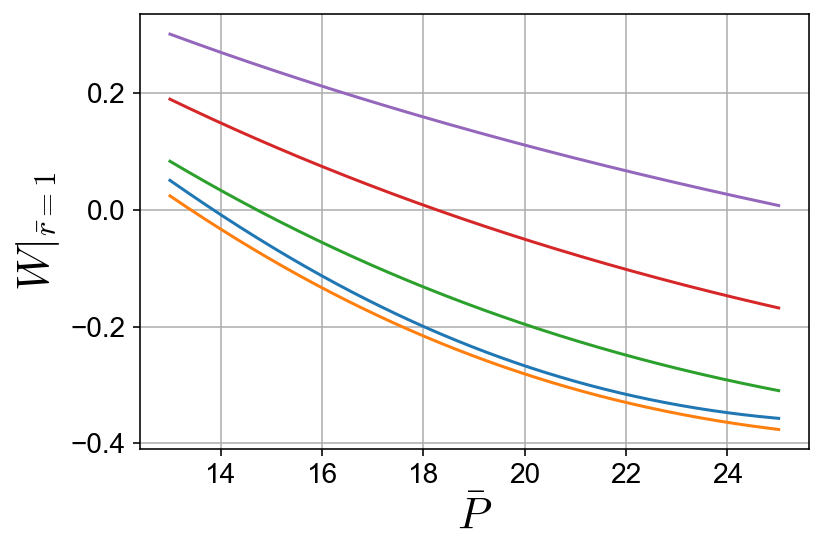

In [24]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']='sans'
rcParams['font.sans-serif']='Arial'
rcParams['font.size']=14
rcParams['mathtext.fontset']='cm'

import numpy as np
bbar_values = np.arange(0.1,0.6,0.1)

Pbar_values = np.arange(13,25.01,0.01)


for current_bbar_value in bbar_values:
    myfun_values = np.zeros(len(Pbar_values))
    for idx, current_Pbar_value in enumerate(Pbar_values):
        myfun_values[idx] = sp.N(myfun(current_bbar_value,current_Pbar_value))
    
    plt.plot(Pbar_values,myfun_values)
    plt.xlabel(r'$\bar{P}$', fontsize=22)
    plt.ylabel(r'$W |_{\bar{r}=1}$', fontsize=22)
    plt.grid(True)

The critical values can be obtained from the values of $\bar{P}$ where each plot intersects the $W|_{\bar{r}=1} = 0$ line, i.e. the zero axis.